# License Plate blurring

Given an image of a vehicle(s), it is sometimes important to blur out the numberplate for privacy purposes. In this notebook, we use a cascade classifier to first detect numberplates and then use OpenCV to blur these out.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Load your image here

In [5]:
car_plate = cv2.imread('./DATA/my_car_plate_img.jpg')

In [6]:
def display(img):
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)

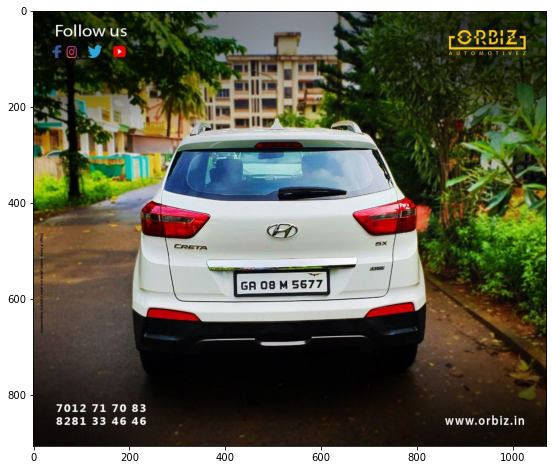

In [7]:
display(car_plate)

Note that in the above picture, the number plate is clearly visible

### Load the number-plate cascade classifier

In [9]:
cascade_classifier = cv2.CascadeClassifier('./DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [13]:
def detect_plate(img):
    
    '''
        Given an image, this function returns an image with a rectangle drawn around each detection of a number-plate
    '''
    
    plate_img = img.copy()
    
    drawn_rectangles = cascade_classifier.detectMultiScale(plate_img, scaleFactor = 1.5)
    print(drawn_rectangles)
    
    for (x, y, w, h) in drawn_rectangles:
        cv2.rectangle(plate_img, (x, y), (x + w, y + h), color = (0, 0, 255), thickness = 6)
        
    return plate_img

In [14]:
result = detect_plate(car_plate)

[[408 532 202  68]]


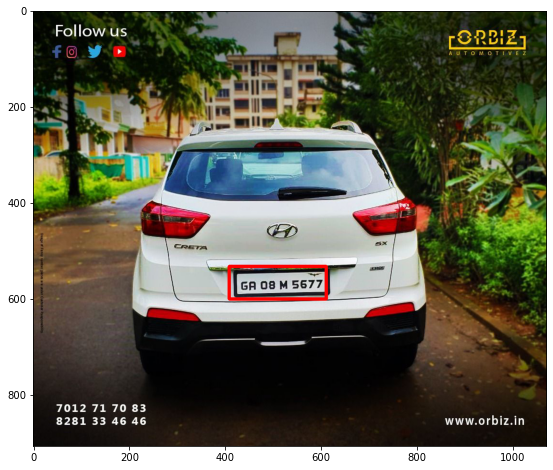

In [15]:
display(result)

### Now on to blurring the detected plate

In [16]:
def detect_and_blur_plate(img):
    
    '''
        This function first detects a numberplate and then applies numpy slicing and cv2.medianBlur to blur it out
    '''
    
    plate_img = img.copy()
    
    rectangles = cascade_classifier.detectMultiScale(plate_img, scaleFactor = 1.2)
    
    for i in range(len(rectangles)):
        x, y, w, h = rectangles[i]
        # Notice how x, y are opposite. We had to change that accordingly.
        plate_to_blur = plate_img[y:y + h, x:x + w, :]
        plate_to_blur = cv2.medianBlur(plate_to_blur, ksize = 11)
        plate_img[y:y + h, x:x + w, :] = plate_to_blur
        
        # Slicing across all 3 dimensions. The last color dimension, we simply take it entirely using :
    return plate_img

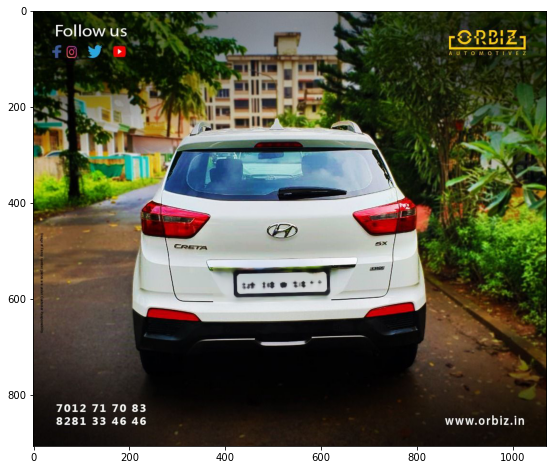

In [17]:
result = detect_and_blur_plate(car_plate)
display(result)

The numbers and characters on the number plate are no longer visible